In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# TCP

In [10]:
# Read file
server_pcap = '/home/wmnlab/Data/23-3-4-19-52_server_pcap.csv'
s_df = pd.read_csv(server_pcap, sep='@')
s_df["frame.time"] = pd.to_datetime(s_df["frame.time"])

client_pcap = '/home/wmnlab/Data/23-3-4-19-52_client_pcap.csv'
c_df = pd.read_csv(client_pcap, sep='@')
c_df["frame.time"] = pd.to_datetime(c_df["frame.time"])

Text(0.5, 0, 'Time')

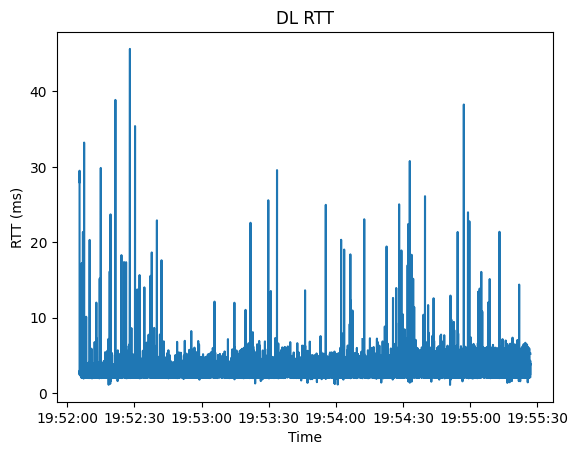

In [21]:
# Plot DL packet RTT -> For DL, we check server end pcap file
df = s_df[s_df['tcp.dstport'] == 3251]
plt.plot(df['frame.time'], df['tcp.analysis.ack_rtt']*1000)
plt.title('DL RTT')
plt.ylabel('RTT (ms)')
plt.xlabel('Time')

Text(0.5, 0, 'Time')

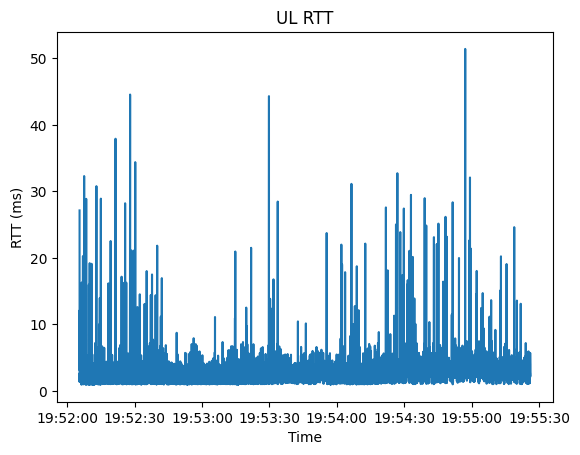

In [24]:
# Plot UL packet RTT -> For UL, we check client end pcap file
df = c_df[c_df['tcp.srcport'] == 3250]
plt.plot(df['frame.time'], df['tcp.analysis.ack_rtt']*1000)
plt.title('UL RTT')
plt.ylabel('RTT (ms)')
plt.xlabel('Time')

# Modem experiment

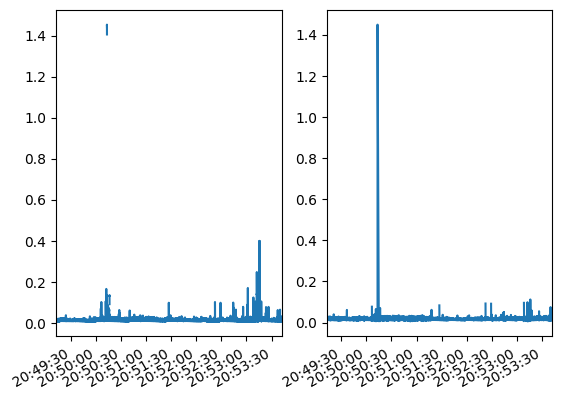

In [66]:
# Database plot observe
date_dir = '/home/wmnlab/D/database/2023-03-16/'
device = 'qc00'
trace = '#12'
ul_file, dl_file = 'udp_dnlk_loss_latency.csv', 'udp_uplk_loss_latency.csv'

fig, axs = plt.subplots(1, 2, sharex=True)
plt.gcf().autofmt_xdate()

for name in os.listdir(date_dir):
    
    name = os.path.join(date_dir, name)
    
    if os.path.isdir(name):
        device_dir = os.path.join(name, device)
        tracedata_dir = os.path.join(device_dir, trace, 'data')
        ul_file, dl_file = os.path.join(tracedata_dir, ul_file), os.path.join(tracedata_dir, dl_file)
        ul_df = pd.read_csv(ul_file)
        dl_df = pd.read_csv(dl_file)
        ul_df['Timestamp'], dl_df['Timestamp'] = pd.to_datetime(ul_df['Timestamp']), pd.to_datetime(dl_df['Timestamp'])
        axs[0].plot(ul_df['Timestamp'], ul_df['latency'])
        axs[0].set_xlim([ul_df['Timestamp'].iloc[0], ul_df['Timestamp'].iloc[-1]])
        axs[1].plot(dl_df['Timestamp'], dl_df['latency'])
        axs[1].set_xlim([ul_df['Timestamp'].iloc[0], ul_df['Timestamp'].iloc[-1]])


Timestamp('2023-03-16 19:23:52.517195')

In [12]:
# ml_data
ml_data = '/home/wmnlab/ml_data'
files = [os.path.join(ml_data, x) for x in os.listdir(ml_data)]
files.sort()